In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt    
import seaborn as sns

In [42]:
df = pd.read_csv('resultado_final.csv')
df.head()

,name,missing_values,mv_percentage,imputer_method,outlier_method,normalization_method,classification_method,knn_neighbors,mlp_activation,mlp_first_layer,mlp_second_layer,mlp_max_iter,mlp_learning_rate,mlp_learning_rate_init,mlp_tol,accuracy,precision,recall,f1
0,Experimento 1,True,5,knn,3sigma,minmax,knn,10,logistic,12,3,500,constant,0.3,0.00001,0.918375,0.934126,0.927462,0.930438
1,Experimento 1,True,5,knn,3sigma,minmax,knn,10,logistic,12,3,500,constant,0.3,0.00001,0.916832,0.931747,0.926042,0.928448
2,Experimento 1,True,5,knn,3sigma,minmax,knn,10,logistic,12,3,500,constant,0.3,0.00001,0.916758,0.931956,0.926302,0.928805
3,Experimento 1,True,5,knn,3sigma,minmax,knn,10,logistic,12,3,500,constant,0.3,0.00001,0.919770,0.934679,0.929191,0.931597
4,Experimento 1,True,5,knn,3sigma,minmax,knn,10,logistic,12,3,500,constant,0.3,0.00001,0.919770,0.934777,0.928520,0.931324


In [43]:
columns_to_convert = ['accuracy', 'precision', 'recall', 'f1']

df[columns_to_convert] = (df[columns_to_convert] * 100).round(2)
df.head()

,name,missing_values,mv_percentage,imputer_method,outlier_method,normalization_method,classification_method,knn_neighbors,mlp_activation,mlp_first_layer,mlp_second_layer,mlp_max_iter,mlp_learning_rate,mlp_learning_rate_init,mlp_tol,accuracy,precision,recall,f1
0,Experimento 1,True,5,knn,3sigma,minmax,knn,10,logistic,12,3,500,constant,0.3,0.00001,91.84,93.41,92.75,93.04
1,Experimento 1,True,5,knn,3sigma,minmax,knn,10,logistic,12,3,500,constant,0.3,0.00001,91.68,93.17,92.60,92.84
2,Experimento 1,True,5,knn,3sigma,minmax,knn,10,logistic,12,3,500,constant,0.3,0.00001,91.68,93.20,92.63,92.88
3,Experimento 1,True,5,knn,3sigma,minmax,knn,10,logistic,12,3,500,constant,0.3,0.00001,91.98,93.47,92.92,93.16
4,Experimento 1,True,5,knn,3sigma,minmax,knn,10,logistic,12,3,500,constant,0.3,0.00001,91.98,93.48,92.85,93.13


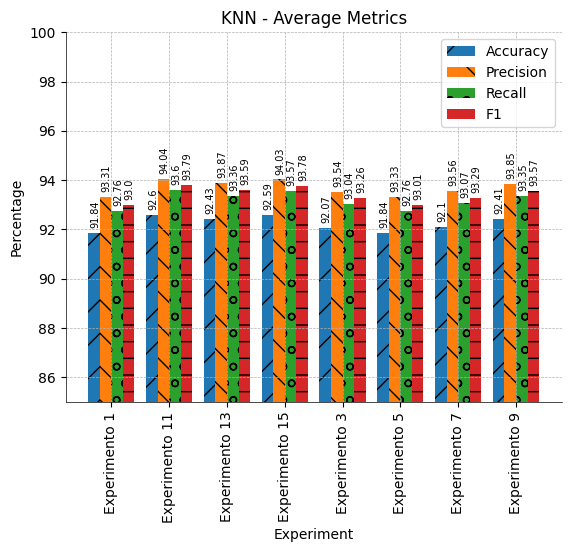

In [84]:
def add_labels(bars):
    for bar in bars:
        height = bar.get_height().round(2)
        plt.text(
            bar.get_x() + bar.get_width() / 2.0 + 0.02, height + 0.2,
            f'{height}', ha='center', va='bottom', fontsize=7, color='black', rotation=90
        )


df_knn = df[(df['classification_method'] == 'knn') & (df['name'] != 'Koklu-knn-minmax') & (df['name'] != 'Koklu-knn--1')]

average_accuracy = df_knn.groupby('name')['accuracy'].mean().reset_index()
average_precision = df_knn.groupby('name')['precision'].mean().reset_index()
average_recall = df_knn.groupby('name')['recall'].mean().reset_index()
average_f1 = df_knn.groupby('name')['f1'].mean().reset_index()

x_axis = np.arange(len(average_accuracy))
hatches = ['/', '\\', 'o', '-']

plt.Figure(figsize=(10, 5))
bars1 = plt.bar(x_axis-0.3, average_accuracy['accuracy'], label='Accuracy', width=0.2, hatch=hatches[0])
bars2 = plt.bar(x_axis-0.1, average_precision['precision'], label='Precision', width=0.2, hatch=hatches[1])
bars3 = plt.bar(x_axis+0.1, average_recall['recall'], label='Recall', width=0.2, hatch=hatches[2])
bars4 = plt.bar(x_axis+0.3, average_f1['f1'], label='F1', width=0.2, hatch=hatches[3])

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)
add_labels(bars4)


plt.xticks(x_axis, average_accuracy['name'], rotation=90)
plt.ylim(85,100)
plt.xlabel("Experiment") 
plt.ylabel("Percentage")
plt.legend()
plt.title("KNN - Average Metrics")

plt.grid(True, linestyle='--', linewidth=0.5)
plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)




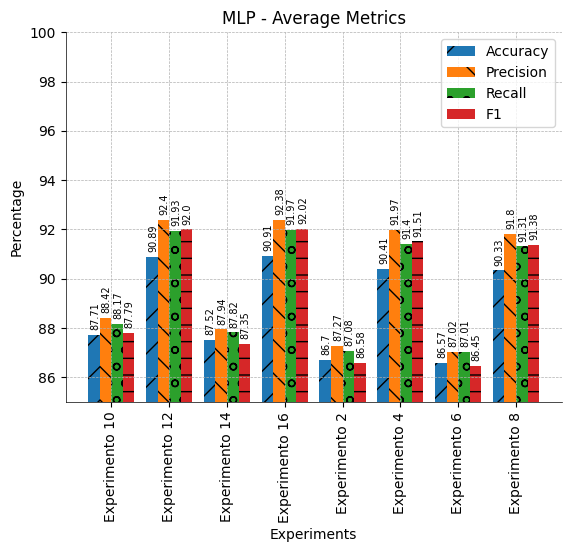

In [87]:
def add_labels(bars):
    for bar in bars:
        height = bar.get_height().round(2)
        plt.text(
            bar.get_x() + bar.get_width() / 2.0 + 0.02, height + 0.2,
            f'{height}', ha='center', va='bottom', fontsize=7, color='black', rotation=90
        )


df_mlp = df[(df['classification_method'] == 'mlp') & (df['name'] != 'Koklu-mlp-minmax') & (df['name'] != 'Koklu-mlp--1')]

average_accuracy = df_mlp.groupby('name')['accuracy'].mean().reset_index()
average_precision = df_mlp.groupby('name')['precision'].mean().reset_index()
average_recall = df_mlp.groupby('name')['recall'].mean().reset_index()
average_f1 = df_mlp.groupby('name')['f1'].mean().reset_index()

x_axis = np.arange(len(average_accuracy))
hatches = ['/', '\\', 'o', '-']

plt.Figure(figsize=(10, 5))
bars1 = plt.bar(x_axis-0.3, average_accuracy['accuracy'], label='Accuracy', width=0.2, hatch=hatches[0])
bars2 = plt.bar(x_axis-0.1, average_precision['precision'], label='Precision', width=0.2, hatch=hatches[1])
bars3 = plt.bar(x_axis+0.1, average_recall['recall'], label='Recall', width=0.2, hatch=hatches[2])
bars4 = plt.bar(x_axis+0.3, average_f1['f1'], label='F1', width=0.2, hatch=hatches[3])

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)
add_labels(bars4)


plt.xticks(x_axis, average_accuracy['name'], rotation=90)
plt.ylim(85,100)
plt.xlabel("Experiments") 
plt.ylabel("Percentage")
plt.legend()
plt.title("MLP - Average Metrics")

plt.grid(True, linestyle='--', linewidth=0.5)
plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)



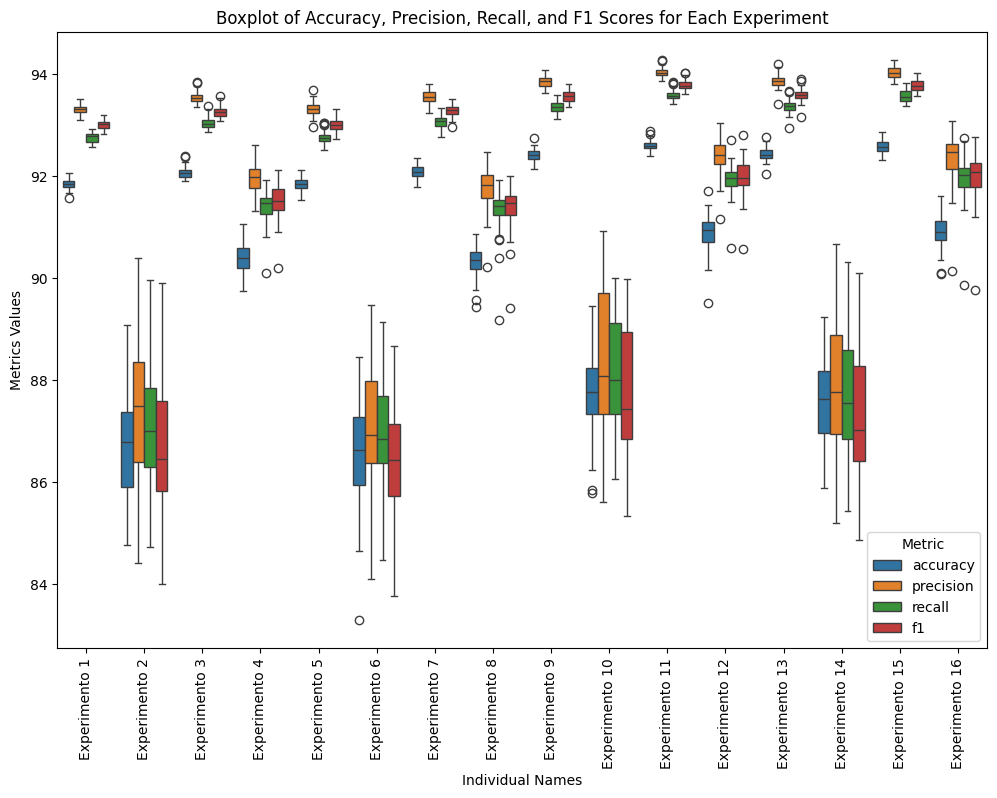

In [98]:
# Melt the dataframe
df_x = df[df['name'].str.startswith('Experiment')]
melted_df = pd.melt(df_x, 
                    id_vars=['name'], 
                    value_vars=['accuracy', 'precision', 'recall', 'f1'], 
                    var_name='metric', 
                    value_name='value')

# Set the figure size
plt.figure(figsize=(12, 8))

# Create the boxplot
sns.boxplot(x='name', y='value', hue='metric', data=melted_df)

# Customize the plot
plt.xlabel('Individual Names')
plt.ylabel('Metrics Values')
plt.title('Boxplot of Accuracy, Precision, Recall, and F1 Scores for Each Experiment')
plt.xticks(rotation=90)
plt.legend(title='Metric')

[]

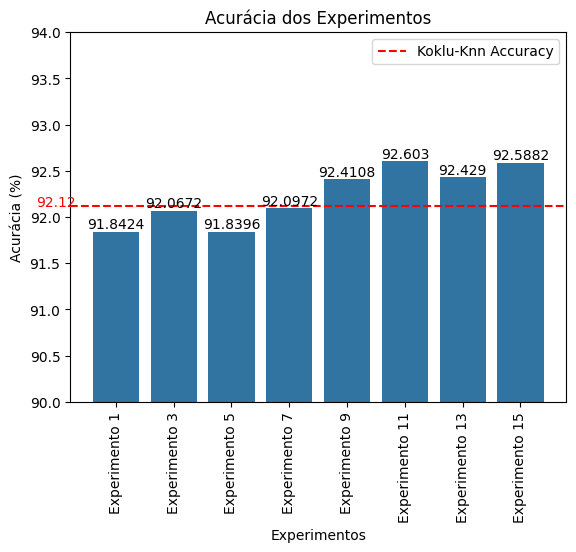

In [44]:
df_knn = df[(df['classification_method'] == 'knn') & (df['name'] != 'Koklu-knn-minmax') & (df['name'] != 'Koklu-knn--1')]


# Add horizontal line for Koklu-Knn accuracy
koklu_knn_accuracy = df[df['name'] == 'Koklu-knn-minmax']['accuracy'].values[0]
plt.axhline(y=koklu_knn_accuracy, color='r', linestyle='--', label='Koklu-Knn Accuracy')
plt.text(-0.7, koklu_knn_accuracy, str(koklu_knn_accuracy), color='Red', ha='right', fontsize=10)
ax = sns.barplot(df, y=df_knn["accuracy"], x=df_knn.name, errorbar=None)

plt.xticks(rotation=90)
plt.title("Acurácia dos Experimentos")
plt.ylabel("Acurácia (%)")
plt.xlabel("Experimentos")
ax.bar_label(ax.containers[0], fontsize=10)
ax.set(ylim=(90, 94))
ax.plot()

[(80.0, 95.0)]

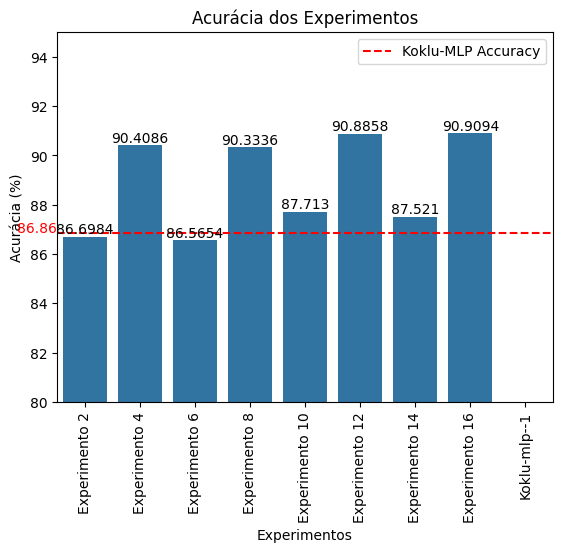

In [ ]:
df_mlp = df[(df['classification_method'] == 'mlp') & (df['name'] != 'Koklu-mlp-minmax') & (df['name'] != 'Koklu-knn--1')]
# Add horizontal line for Koklu-MLP accuracy
koklu_mlp_accuracy = df[df['name'] == 'Koklu-mlp-minmax']['accuracy'].values[0]
plt.axhline(y=koklu_mlp_accuracy, color='r', linestyle='--', label='Koklu-MLP Accuracy')
plt.text(-0.5, koklu_mlp_accuracy, str(koklu_mlp_accuracy), color='Red', ha='right', fontsize=10)
ax = sns.barplot(df, y=df_mlp["accuracy"], x=df_mlp.name, errorbar=None)
plt.xticks(rotation=90)
plt.title("Acurácia dos Experimentos")
plt.ylabel("Acurácia (%)")
plt.xlabel("Experimentos")
ax.bar_label(ax.containers[0], fontsize=10)
ax.set(ylim=(80, 95))


[]

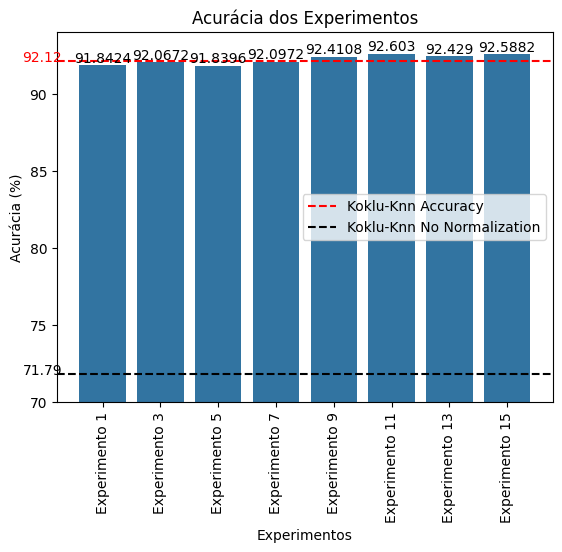

In [ ]:
df_knn = df[(df['classification_method'] == 'knn') & (df['name'] != 'Koklu-knn-minmax') & (df['name'] != 'Koklu-knn--1')]


# Add horizontal line for Koklu-Knn accuracy
koklu_knn_accuracy = df[df['name'] == 'Koklu-knn-minmax']['accuracy'].values[0]
koklu_knn_no_normalization = df[df['name'] == 'Koklu-knn--1']['accuracy'].values[0]
plt.axhline(y=koklu_knn_accuracy, color='r', linestyle='--', label='Koklu-Knn Accuracy')
plt.axhline(y=koklu_knn_no_normalization, color='black', linestyle='--', label='Koklu-Knn No Normalization')
plt.text(-0.7, koklu_knn_accuracy, str(koklu_knn_accuracy), color='Red', ha='right', fontsize=10)
plt.text(-0.7, koklu_knn_no_normalization, str(koklu_knn_no_normalization), color='Black', ha='right', fontsize=10)
ax = sns.barplot(df, y=df_knn["accuracy"], x=df_knn.name, errorbar=None)

plt.xticks(rotation=90)
plt.title("Acurácia dos Experimentos")
plt.ylabel("Acurácia (%)")
plt.xlabel("Experimentos")
ax.bar_label(ax.containers[0], fontsize=10)
ax.set(ylim=(70, 94))
ax.plot()

[(10.0, 95.0)]

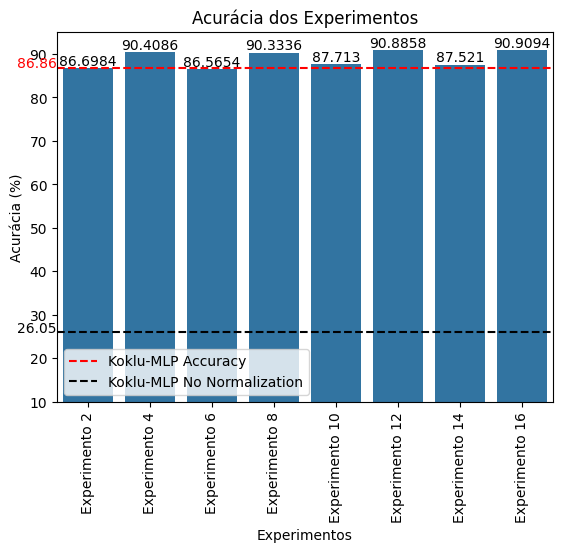

In [ ]:
df_mlp = df[(df['classification_method'] == 'mlp') & (df['name'] != 'Koklu-mlp-minmax') & (df['name'] != 'Koklu-mlp--1')]
# Add horizontal line for Koklu-MLP accuracy
koklu_mlp_accuracy = df[df['name'] == 'Koklu-mlp-minmax']['accuracy'].values[0]
koklu_mlp_no_normalization = df[df['name'] == 'Koklu-mlp--1']['accuracy'].values[0]
plt.axhline(y=koklu_mlp_accuracy, color='r', linestyle='--', label='Koklu-MLP Accuracy')
plt.axhline(y=koklu_mlp_no_normalization, color='black', linestyle='--', label='Koklu-MLP No Normalization')
plt.text(-0.5, koklu_mlp_accuracy, str(koklu_mlp_accuracy), color='Red', ha='right', fontsize=10)
plt.text(-0.5, koklu_mlp_no_normalization, str(koklu_mlp_no_normalization), color='Black', ha='right', fontsize=10)
ax = sns.barplot(df, y=df_mlp["accuracy"], x=df_mlp.name, errorbar=None)
plt.xticks(rotation=90)
plt.title("Acurácia dos Experimentos")
plt.ylabel("Acurácia (%)")
plt.xlabel("Experimentos")
ax.bar_label(ax.containers[0], fontsize=10)
ax.set(ylim=(10, 95))

Text(0.5, 0, 'Experimentos')

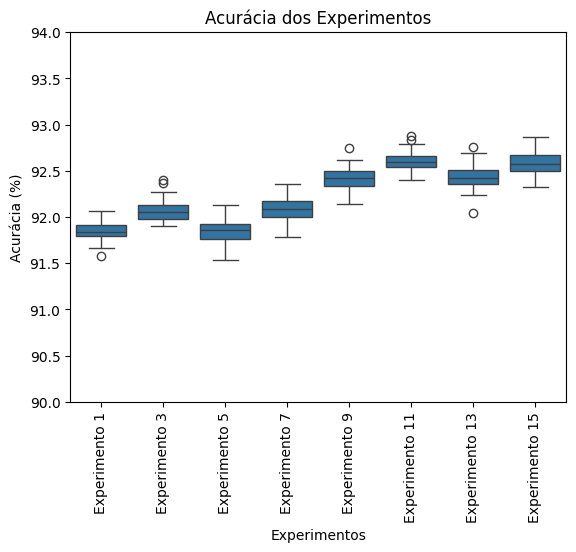

In [ ]:
ax = sns.boxplot(data=df_knn, x='name', y='accuracy')
plt.xticks(rotation=90)
plt.title("Acurácia dos Experimentos")
plt.ylabel("Acurácia (%)")
ax.set(ylim=(90, 94))
plt.xlabel("Experimentos")

Text(0.5, 0, 'Experimentos')

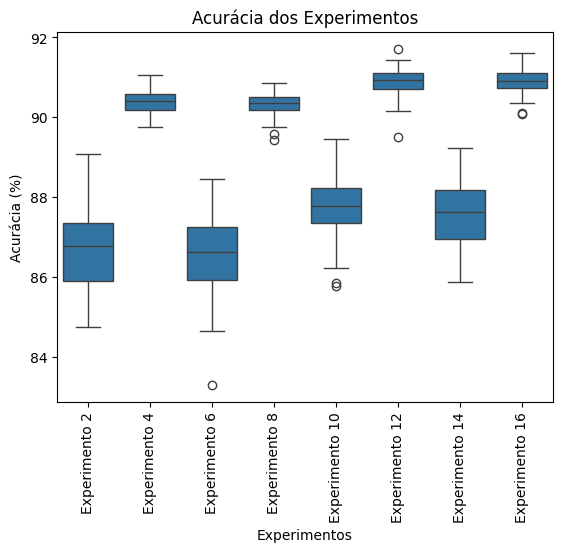

In [ ]:
sns.boxplot(data=df_mlp, x='name', y='accuracy')
plt.xticks(rotation=90)
plt.title("Acurácia dos Experimentos")
plt.ylabel("Acurácia (%)")
plt.xlabel("Experimentos")

In [ ]:
df.loc[df['name'] == 'Koklu-knn-minmax', 'name'] = 'Koklu-Knn com Normalização'
df.loc[df['name'] == 'Koklu-knn--1', 'name'] = 'Koklu-Knn sem Normalização'
df.loc[df['name'] == 'Koklu-mlp-minmax', 'name'] = 'Koklu-MLP com Normalização'
df.loc[df['name'] == 'Koklu-mlp--1', 'name'] = 'Koklu-MLP sem Normalização'

In [ ]:
df_knn.groupby('name')['accuracy'].mean()

name
Experimento 1     91.842449
Experimento 11    92.603000
Experimento 13    92.429000
Experimento 15    92.588200
Experimento 3     92.067200
Experimento 5     91.839600
Experimento 7     92.097200
Experimento 9     92.410800
Name: accuracy, dtype: float64

In [ ]:
df.groupby('name')[['accuracy', 'precision', 'recall', 'f1']].mean().round(2)

,accuracy,precision,recall,f1
name,,,,
Experimento 1,91.84,93.31,92.76,93.00
Experimento 10,87.71,88.42,88.17,87.79
Experimento 11,92.60,94.04,93.60,93.79
Experimento 12,90.89,92.40,91.93,92.00
Experimento 13,92.43,93.87,93.36,93.59
Experimento 14,87.52,87.94,87.82,87.35
Experimento 15,92.59,94.03,93.57,93.78
Experimento 16,90.91,92.38,91.97,92.02
Experimento 2,86.70,87.27,87.08,86.58


In [ ]:
df[df['classification_method'] == 'knn'].groupby('name')[['accuracy', 'precision', 'recall', 'f1']].mean().round(2)

,accuracy,precision,recall,f1
name,,,,
Experimento 1,91.84,93.31,92.76,93.00
Experimento 11,92.60,94.04,93.60,93.79
Experimento 13,92.43,93.87,93.36,93.59
Experimento 15,92.59,94.03,93.57,93.78
Experimento 3,92.07,93.54,93.04,93.26
Experimento 5,91.84,93.33,92.76,93.01
Experimento 7,92.10,93.56,93.07,93.29
Experimento 9,92.41,93.85,93.35,93.57
Koklu-Knn com Normalização,92.18,93.64,93.15,93.36


In [ ]:
df[df['classification_method'] == 'mlp'].groupby('name')[['accuracy', 'precision', 'recall', 'f1']].mean().round(2)

,accuracy,precision,recall,f1
name,,,,
Experimento 10,87.71,88.42,88.17,87.79
Experimento 12,90.89,92.40,91.93,92.00
Experimento 14,87.52,87.94,87.82,87.35
Experimento 16,90.91,92.38,91.97,92.02
Experimento 2,86.70,87.27,87.08,86.58
Experimento 4,90.41,91.97,91.40,91.51
Experimento 6,86.57,87.02,87.01,86.45
Experimento 8,90.33,91.80,91.31,91.38
Koklu-MLP com Normalização,87.40,88.22,87.99,87.61


In [17]:
df1 = pd.read_csv('results_aprimoramento.csv')

columns_to_convert = ['accuracy', 'precision', 'recall', 'f1']

df1[columns_to_convert] = (df1[columns_to_convert] * 100).round(2)
df1.head()

,Experiment,missing_values,mv_percentage,imputer_method,outlier_method,normalization_method,classification_method,knn_neighbors,mlp_activation,mlp_first_layer,mlp_second_layer,mlp_max_iter,mlp_learning_rate,mlp_learning_rate_init,mlp_tol,accuracy,precision,recall,f1
0,Ap-10-5-1500-0.003,True,5,il,mad,zscore,mlp,10,logistic,10,5,1500,adaptive,0.003,0.00001,93.08,94.27,93.96,94.09
1,Ap-10-5-1500-0.003,True,5,il,mad,zscore,mlp,10,logistic,10,5,1500,adaptive,0.003,0.00001,92.95,94.08,93.84,93.94
2,Ap-10-5-1500-0.003,True,5,il,mad,zscore,mlp,10,logistic,10,5,1500,adaptive,0.003,0.00001,92.98,94.12,93.91,94.00
3,Ap-10-5-1500-0.003,True,5,il,mad,zscore,mlp,10,logistic,10,5,1500,adaptive,0.003,0.00001,92.89,94.06,93.72,93.88
4,Ap-10-5-1500-0.003,True,5,il,mad,zscore,mlp,10,logistic,10,5,1500,adaptive,0.003,0.00001,93.01,94.16,93.90,94.00


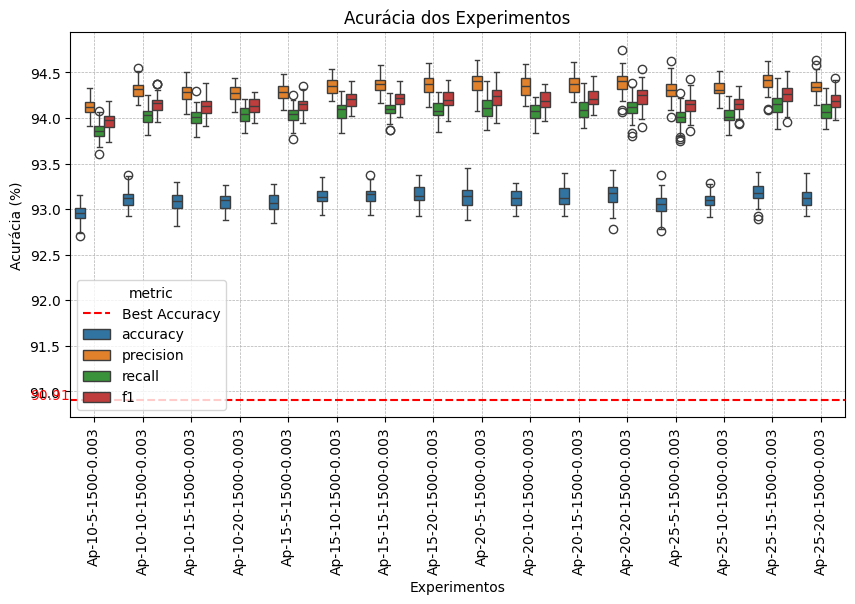

In [135]:
# Add horizontal line for Koklu-MLP accuracy
best_acc = 90.91
best_prec = 92.38
best_rec = 91.97
best_f1 = 92.02
melted_df = pd.melt(df1, 
                    id_vars=['Experiment'], 
                    value_vars=['accuracy', 'precision', 'recall', 'f1'], 
                    var_name='metric', 
                    value_name='value')
plt.figure(figsize=(10, 5))
plt.axhline(y=best_acc, color='r', linestyle='--', label='Best Accuracy')
plt.text(-0.5, best_acc, str(best_acc), color='Red', ha='right', fontsize=10)
ax = sns.boxplot(x='Experiment', y='value', hue='metric', data=melted_df)
plt.xticks(rotation=90)
plt.title("Acurácia dos Experimentos")
plt.ylabel("Acurácia (%)")
plt.xlabel("Experimentos")

plt.grid(True, linestyle='--', linewidth=0.5)

